# Image Compression 

KMeans are widely used in one specific case, which is image compression. Let's test this feature a little bit.

0. Import usuals librairies

In [1]:
import numpy as np

1. In Scikit Learn, import _load_sample_image_ and load “china.jpg” or “flower.jpg” picture

In [45]:
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg')  

2. Via matplotlib, diplay your picture

      a. Hint : we will use _imshow_

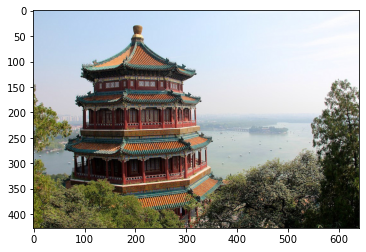

In [46]:
from matplotlib import pyplot as plt

plt.imshow(china)
plt.show()

  3. Look at the dataset's shape

In [47]:
x, y, rgb = china.shape
x, y, rgb

(427, 640, 3)

----> Our dataset is split between the height of the pixel, the width of the pixel and its color in RGB

4. DDivide your dataset by 255 then resize it in two dimensions (length x width, RGB). 

  a. Hint: You can use the ```.reshape()``` method.

In [48]:
china_norm = (china / 255).reshape(x*y, rgb)
china_norm.shape

(273280, 3)

5. We will reduce the number of colours to 16. To do this create a KMeans algorithm that will take 16 clusters.


Instead of using KMeans, you can use [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html)

In [49]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters= 16, init = "k-means++", random_state = 0)
clusters = kmeans.fit_predict(china_norm)

6. For each of the colors present in your dataset, reassign the color code of the centroid of the corresponding cluster in a variable that we will call _new_colors_ .

In [50]:
new_colors = np.array([kmeans.cluster_centers_[idx] for idx in clusters])
new_colors.shape

(273280, 3)

7. Resize _new_colors_ to 3 dimensions

In [51]:
new_colors = new_colors.reshape(x, y, rgb)
new_colors.shape

(427, 640, 3)

8. Visualize your new image with your variable _new_colors_.

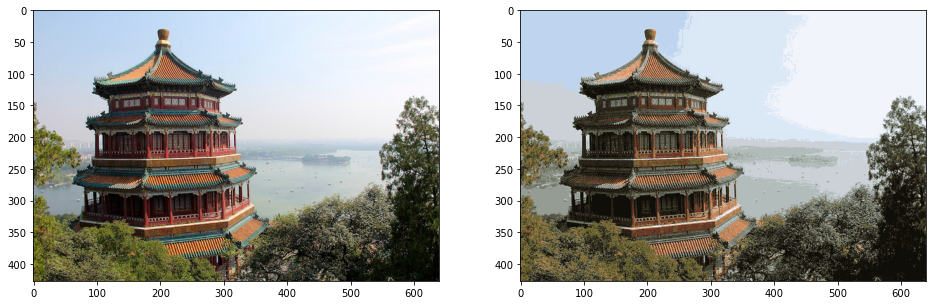

In [52]:
f, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].imshow(china)
ax[1].imshow((new_colors * 255).astype(int))
plt.show()